In [25]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [26]:
data = pd.read_excel('Base/TH_TOBE_B1000.xlsx', sheet_name='Sheet1')
data_c1 = pd.read_excel('SC1/TH_TOBE_B1000.xlsx', sheet_name='Sheet1')
data_c2 = pd.read_excel('SC2/TH_TOBE_B1000.xlsx', sheet_name='Sheet1')
data_c3 = pd.read_excel('SC3/TH_TOBE_B1000.xlsx', sheet_name='Sheet1')

data_c1_release = pd.read_excel('SC1/TH_TOBE_release.xlsx', sheet_name='Sheet1')



In [27]:
data = data.iloc[::2]
data_c1 = data_c1.iloc[::2]
data_c2 = data_c2.iloc[::2]
data_c3 = data_c3.iloc[::2]

data_c1_release = data_c1_release.iloc[::2]

In [28]:
print(data.head(10))

    Time   A   B   C   D   E   F   G   H
0      0   0   0   0   0   0   0   0   0
2      5   1   1   1   0   1   0   0   2
4     10   3   3   3   2   3   2   3   3
6     15   5   5   5   4   5   4   4   6
8     20   7   7   6   6   6   6   6   7
10    25   9   9   8   8   8   8   7  10
12    30  11  11  10  10  10  10   9  11
14    35  13  13  11  12  11  12  11  13
16    40  15  15  13  14  13  14  12  16
18    45  17  17  15  16  15  16  14  17


In [29]:
assy = data.iloc[-1]
assy

Time    10080
A        4031
B        4031
C        3360
D        4030
E        3360
F        4030
G        3359
H        4031
Name: 4032, dtype: int64

In [30]:
#Define the time you are running your model
T = 7*24*60

assy = data.iloc[-1]
assy_c1 = data_c1.iloc[-1]
assy_c2 = data_c2.iloc[-1]
assy_c3 = data_c3.iloc[-1]
assy_c1_release = data_c1_release.iloc[-1]

TH = assy/T
TH_c1 = assy_c1/T
TH_c2 = assy_c2/T
TH_c3 = assy_c3/T
TH_c1_release = assy_c1_release/T

TH = TH.iloc[1:]
TH_c1 = TH_c1.iloc[1:]
TH_c2 = TH_c2.iloc[1:]
TH_c3 = TH_c3.iloc[1:]
TH_c1_release = TH_c1_release.iloc[1:]

In [31]:
assy_df = assy.to_frame()
assy_df = assy_df.T
assy_df = assy_df.drop('Time',1)

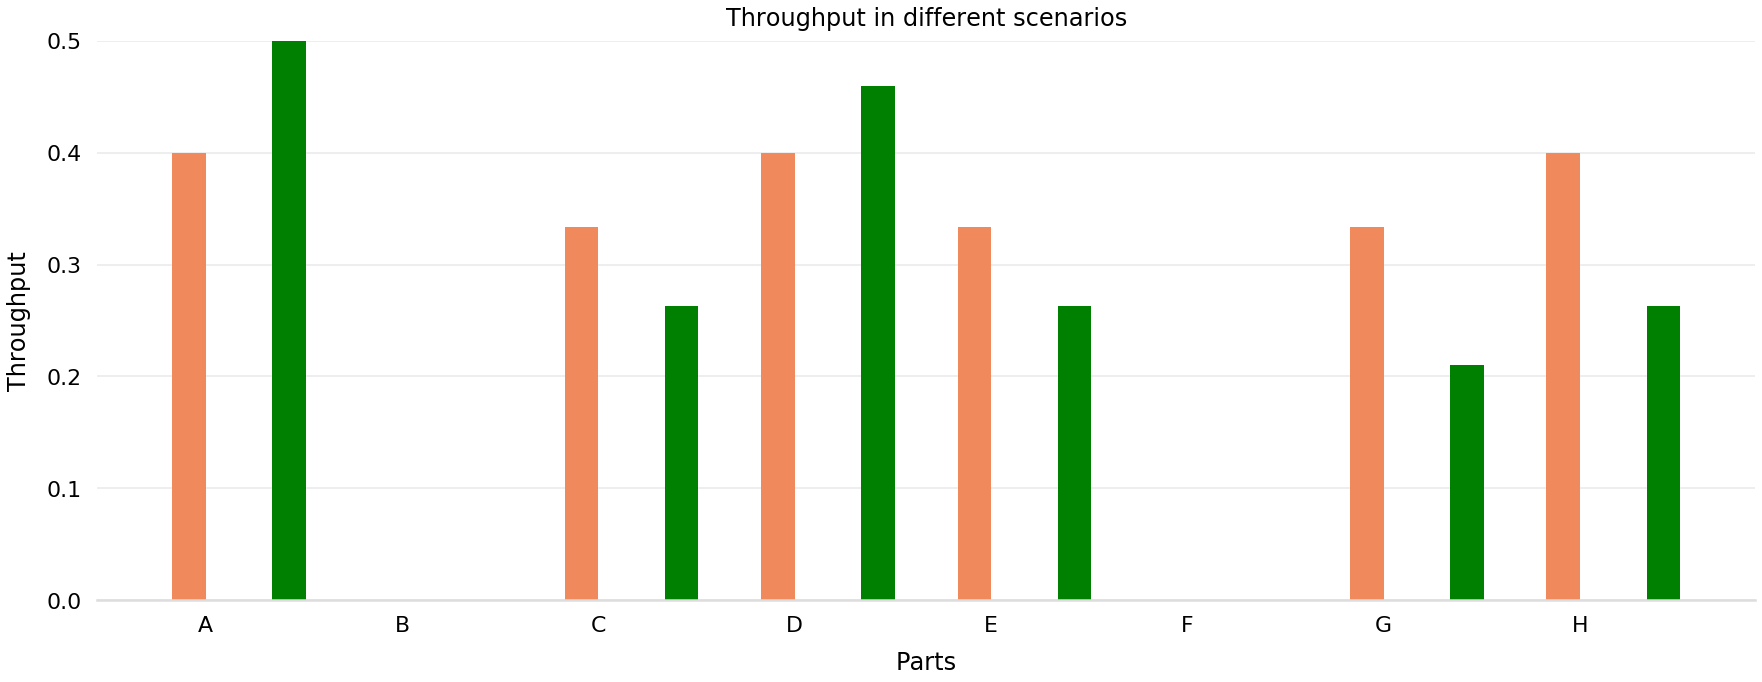

In [37]:
import seaborn as sns
sns.set_context('poster')


fig, ax = plt.subplots(figsize=(25, 10))

x = np.arange(len(assy_df.columns))

bar_width = 0.17

#b0 = ax.bar(x, TH, width=bar_width,color = "#f9ed69", label ='Base')
b1 = ax.bar(x + bar_width, TH_c1,width=bar_width,color="#f08a5d", label='Scenario 1')
#b2 = ax.bar(x + 2*bar_width, TH_c2, width=bar_width,color="#b83b5e",label='Scenario 2')
#b3 = ax.bar(x + 3*bar_width, TH_c3, width=bar_width,color="#6a2c70",label='Scenario 3')
b4 = ax.bar(x + 4*bar_width, TH_c1_release, width=bar_width,color="green",label='Scenario 1_release')


# Fix the x-axes.
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(assy_df.columns)


# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.ylim([0, 0.5])



# Add axis and chart labels.
ax.set_xlabel('Parts', labelpad=15)
ax.set_ylabel('Throughput', labelpad=15)
ax.set_title('Throughput in different scenarios', pad=15)

#plt.legend(bbox_to_anchor=(0.2,-0.25,0.5,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=4)

fig.tight_layout()
plt.savefig('TH_TOBE.png', transparent=True, dpi=200)

In [33]:
assy[1:9].sum()/32000

0.94475

In [34]:
assy_c1[1:9].sum()/30000

0.7390666666666666

In [35]:
assy_c2[1:9].sum()/30000

0.6719

In [12]:
assy_c3[1:9].sum()/30000

0.6719333333333334

In [20]:
TH.mean()

0.3749007936507936

In [21]:
TH_c1.mean()

0.2749503968253968

In [22]:
TH_c2.mean()

0.2499627976190476

In [23]:
TH_c3.mean()

0.24997519841269839

In [24]:
TH_c1_release

A    0.399901
B    0.399901
C    0.399901
D    0.399802
E    0.399901
F    0.399802
G    0.399802
H    0.399901
Name: 4032, dtype: float64

In [38]:
assy_c1

Time    10080
A        4031
B           0
C        3360
D        4030
E        3360
F           0
G        3359
H        4032
Name: 4032, dtype: int64

In [39]:
assy_c1_release

Time    10080
A        5443
B           0
C        2652
D        4634
E        2652
F           0
G        2122
H        2652
Name: 2016, dtype: int64

In [41]:
assy_c1[1:9].sum()

22172

In [45]:
assy_c1_release

Time    10080
A        5443
B           0
C        2652
D        4634
E        2652
F           0
G        2122
H        2652
Name: 2016, dtype: int64

In [44]:
22172-20155

2017